In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import pearsonr
from osgeo import gdal

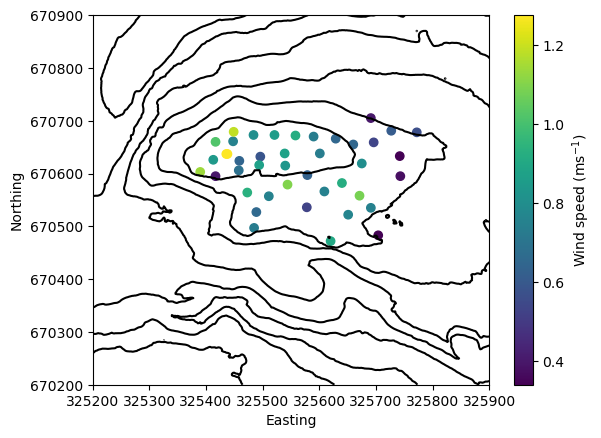

In [ ]:
    ##Creating dataframe from combuined data from both anemometers, as well as JCMB and Kestrel wind speed data

df = pd.read_csv('BlackfordWindDataFull.csv') ; df.set_index('TIME', inplace = False)

    ## Plotting contour to be overlaid

gdal.UseExceptions()
ds = gdal.Open('Blackford_2M_DTM_PHASE5.tif')
xul, dx, _, yul, _, _ = ds.GetGeoTransform()
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
ny, nx = z.shape
x = xul + np.arange(nx)*dx
y = yul - (ny - np.arange(ny))*dx

plt.contour(x,y,z,colors='k')
plt.ylim(top = 670900) ; plt.xlim(left = 325200, right = 325900) # choosing appropriate limits, can be altered if necessary

    ## calibration constants for anemometer 986, 1175 and 1280 respectively from June 1999

mcount = [2.29, 2.4474, 2.49]

    ## Calculation of windspeeds from anemometer counts

df['a_speed1'] = (df['ANEMOMETER 986 #TURNS'] * mcount[0] / 60)/df['KESTREL WINDSPEED'] # anemometer 986 windspeed
df['a_speed2'] = (df['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60)/df['KESTREL WINDSPEED'] # anemometer 1280 windspeed

    ##Scatter plot of all locations weighted by their windspeeds

plt.scatter(df['ANEMOMETER 986 LAT']+300000, df['ANEMOMETER 986 LON']+600000, label = '986', c = df['a_speed1'], cmap = 'viridis')
plt.scatter(df['ANEMOMETER 1280 LAT']+300000, df['ANEMOMETER 1280 LON']+600000, label = '1280', c = df['a_speed2'], cmap = 'viridis')
plt.xlabel('Easting') ; plt.ylabel('Northing')
plt.plot()
plt.colorbar(label = 'Wind speed (ms$^{-1}$)')


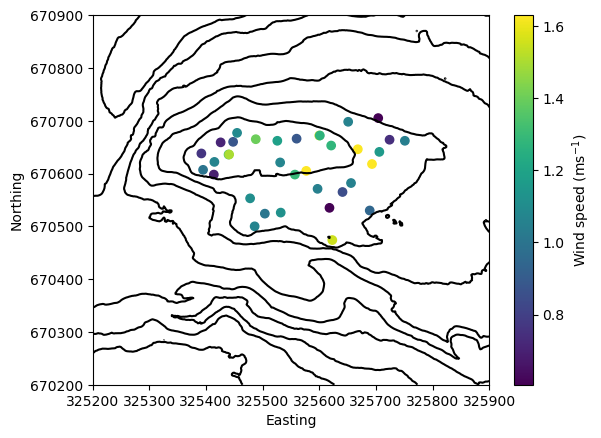

In [ ]:
    ##Creating dataframe from combuined data from both anemometers, as well as JCMB and Kestrel wind speed data

df = pd.read_csv('BlackfordWindDataFullDay2.csv') ; df.set_index('TIME', inplace = False)

    ## Plotting contour to be overlaid

gdal.UseExceptions()
ds = gdal.Open('Blackford_2M_DTM_PHASE5.tif')
xul, dx, _, yul, _, _ = ds.GetGeoTransform()
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
ny, nx = z.shape
x = xul + np.arange(nx)*dx
y = yul - (ny - np.arange(ny))*dx

plt.contour(x,y,z,colors='k')
plt.ylim(top = 670900) ; plt.xlim(left = 325200, right = 325900) # choosing appropriate limits, can be altered if necessary

    ## calibration constants for anemometer 986, 1175 and 1280 respectively from June 1999

mcount = [2.29, 2.4474, 2.49]

    ## Calculation of windspeeds from anemometer counts

df['a_speed1'] = (df['ANEMOMETER 986 #TURNS'] * mcount[0] / 60)/df['KESTREL WINDSPEED'] # anemometer 986 windspeed
df['a_speed2'] = (df['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60)/df['KESTREL WINDSPEED'] # anemometer 1280 windspeed

    ##Scatter plot of all locations weighted by their windspeeds

plt.scatter(df['ANEMOMETER 986 LAT']+300000, df['ANEMOMETER 986 LON']+600000, label = '986', c = df['a_speed1'], cmap = 'viridis')
plt.scatter(df['ANEMOMETER 1280 LAT']+300000, df['ANEMOMETER 1280 LON']+600000, label = '1280', c = df['a_speed2'], cmap = 'viridis')
plt.xlabel('Easting') ; plt.ylabel('Northing')
plt.plot()
plt.colorbar(label = 'Wind speed (ms$^{-1}$)')


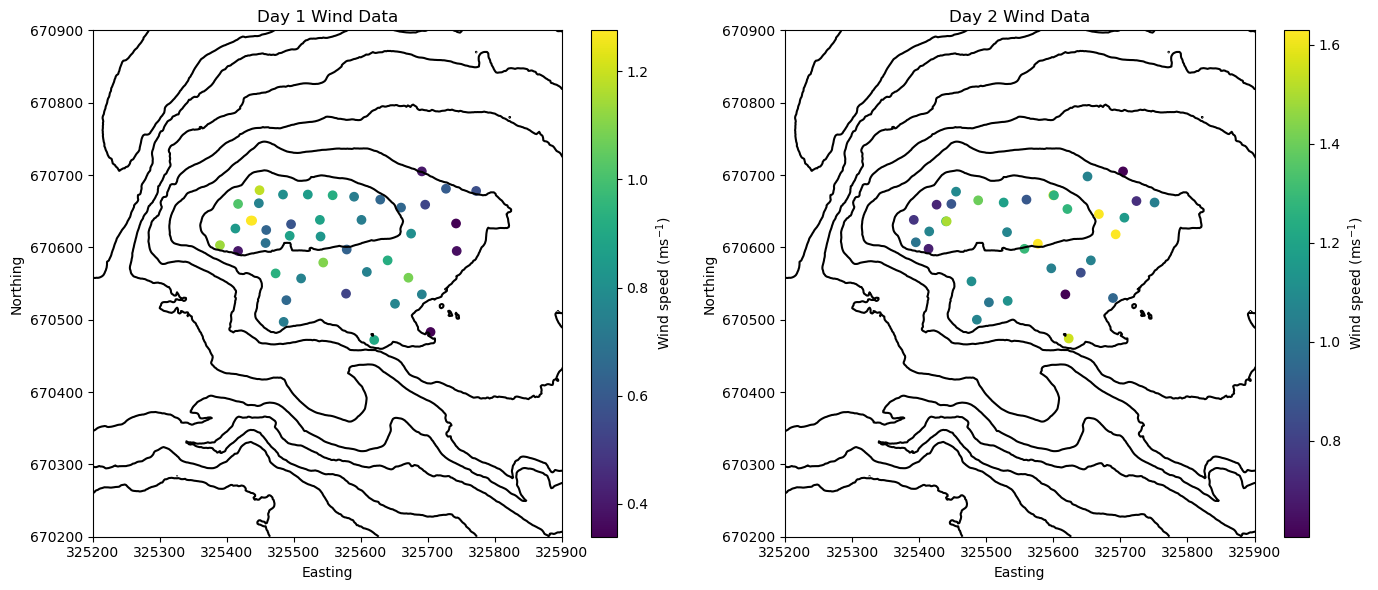

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

def plot_wind_data(ax, filename, title):
    df = pd.read_csv(filename)
    
    # Load and plot contour
    gdal.UseExceptions()
    ds = gdal.Open('Blackford_2M_DTM_PHASE5.tif')
    xul, dx, _, yul, _, _ = ds.GetGeoTransform()
    band = ds.GetRasterBand(1)
    z = band.ReadAsArray()[::-1, :]
    ny, nx = z.shape
    x = xul + np.arange(nx) * dx
    y = yul - (ny - np.arange(ny)) * dx
    
    ax.contour(x, y, z, colors='k')
    ax.set_ylim(top=670900)
    ax.set_xlim(left=325200, right=325900)
    
    # Calibration constants
    mcount = [2.29, 2.4474, 2.49]
    
    # Wind speed calculations
    df['a_speed1'] = (df['ANEMOMETER 986 #TURNS'] * mcount[0] / 60) / df['KESTREL WINDSPEED']
    df['a_speed2'] = (df['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60) / df['KESTREL WINDSPEED']
    
    # Scatter plot
    scatter1 = ax.scatter(df['ANEMOMETER 986 LAT']+300000, df['ANEMOMETER 986 LON']+600000, 
                          label='986', c=df['a_speed1'], cmap='viridis')
    scatter2 = ax.scatter(df['ANEMOMETER 1280 LAT']+300000, df['ANEMOMETER 1280 LON']+600000, 
                          label='1280', c=df['a_speed2'], cmap='viridis')
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_title(title)
    
    # Colorbar
    cbar = plt.colorbar(scatter2, ax=ax)
    cbar.set_label('Wind speed (ms$^{-1}$)')

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_wind_data(axes[0], 'BlackfordWindDataFull.csv', 'Day 1 Wind Data')
plot_wind_data(axes[1], 'BlackfordWindDataFullDay2.csv', 'Day 2 Wind Data')

plt.tight_layout()
plt.savefig('ScatterPlot.png') 
plt.show()



/tmp/ipykernel_284/3390101127.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['TIME'] = pd.to_datetime(df1['TIME'])
/tmp/ipykernel_284/3390101127.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['TIME'] = pd.to_datetime(df2['TIME'])


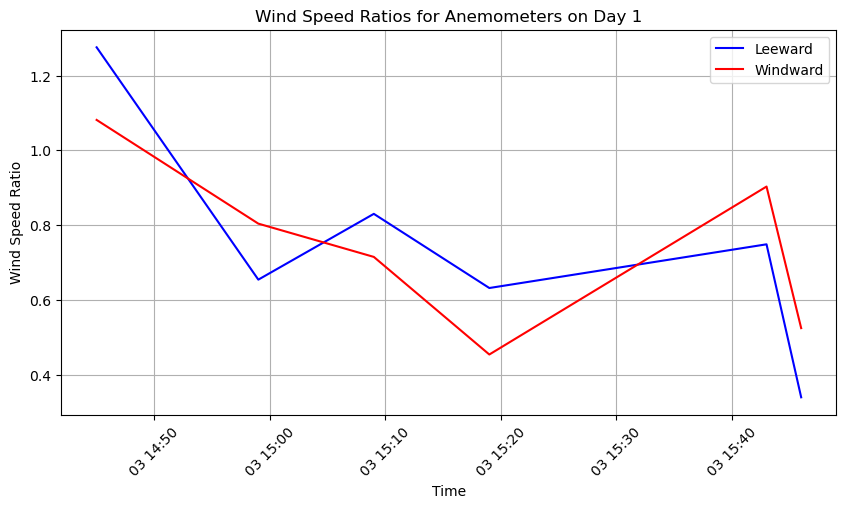

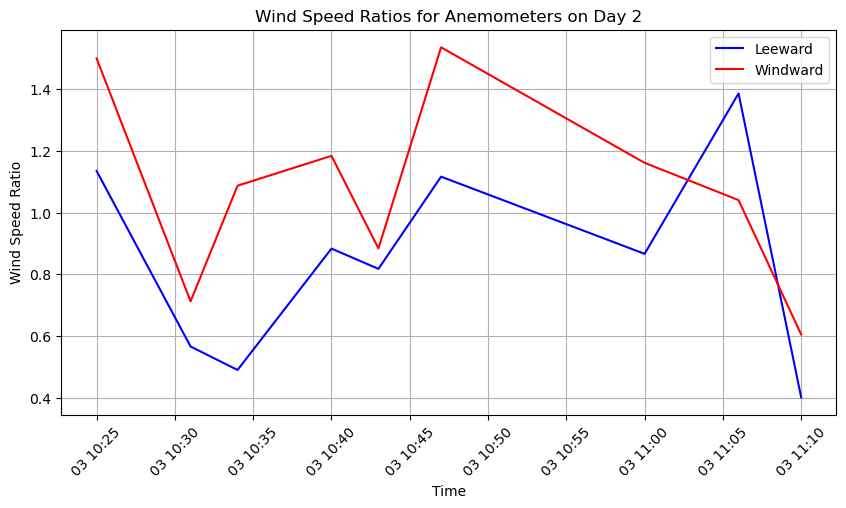

Pearson correlation (Day 1): 0.81
Pearson correlation (Day 2): 0.66


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load CSV files
df1 = pd.read_csv("BlackfordWindDataFull.csv")
df2 = pd.read_csv("BlackfordWindDataFullDay2.csv")

# Define mcount values
mcount = [2.29, 2.60, 2.49]  

# Convert time column to datetime for proper plotting
df1['TIME'] = pd.to_datetime(df1['TIME'])
df2['TIME'] = pd.to_datetime(df2['TIME'])

# Wind speed calculations
df1['a_speed1'] = (df1['ANEMOMETER 986 #TURNS'] * mcount[0] / 60) / df1['KESTREL WINDSPEED']
df1['a_speed2'] = (df1['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60) / df1['KESTREL WINDSPEED']

df2['a_speed3'] = (df2['ANEMOMETER 986 #TURNS'] * mcount[0] / 60) / df2['KESTREL WINDSPEED']
df2['a_speed4'] = (df2['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60) / df2['KESTREL WINDSPEED']

# Drop NaN values to ensure equal-length arrays for correlation
df1 = df1.dropna(subset=['a_speed1', 'a_speed2'])
df2 = df2.dropna(subset=['a_speed3', 'a_speed4'])

# First plot: Day 1
plt.figure(figsize=(10, 5))
plt.plot(df1['TIME'], df1['a_speed2'], label="Leeward", color='blue', linestyle='-')
plt.plot(df1['TIME'], df1['a_speed1'], label="Windward", color='red', linestyle='-')


plt.xlabel("Time")
plt.ylabel("Wind Speed Ratio")
plt.title("Wind Speed Ratios for Anemometers on Day 1")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Second plot: Day 2
plt.figure(figsize=(10, 5))
plt.plot(df2['TIME'], df2['a_speed3'], label="Leeward", color='blue', linestyle='-')
plt.plot(df2['TIME'], df2['a_speed4'], label="Windward", color='red', linestyle='-')

plt.xlabel("Time")
plt.ylabel("Wind Speed Ratio")
plt.title("Wind Speed Ratios for Anemometers on Day 2")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig("WindvsLee")
plt.show()

# Compute correlation for Day 1
if len(df1) > 1:  # Ensure there's enough data
    corr_day1, _ = pearsonr(df1['a_speed1'], df1['a_speed2'])
    print(f"Pearson correlation (Day 1): {corr_day1:.2f}")
else:
    print("Not enough data for correlation on Day 1.")

# Compute correlation for Day 2
if len(df2) > 1:  # Ensure there's enough data
    corr_day2, _ = pearsonr(df2['a_speed3'], df2['a_speed4'])
    print(f"Pearson correlation (Day 2): {corr_day2:.2f}")
else:
    print("Not enough data for correlation on Day 2.")



/tmp/ipykernel_284/4121224529.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['TIME'] = pd.to_datetime(df1['TIME'])
/tmp/ipykernel_284/4121224529.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['TIME'] = pd.to_datetime(df2['TIME'])


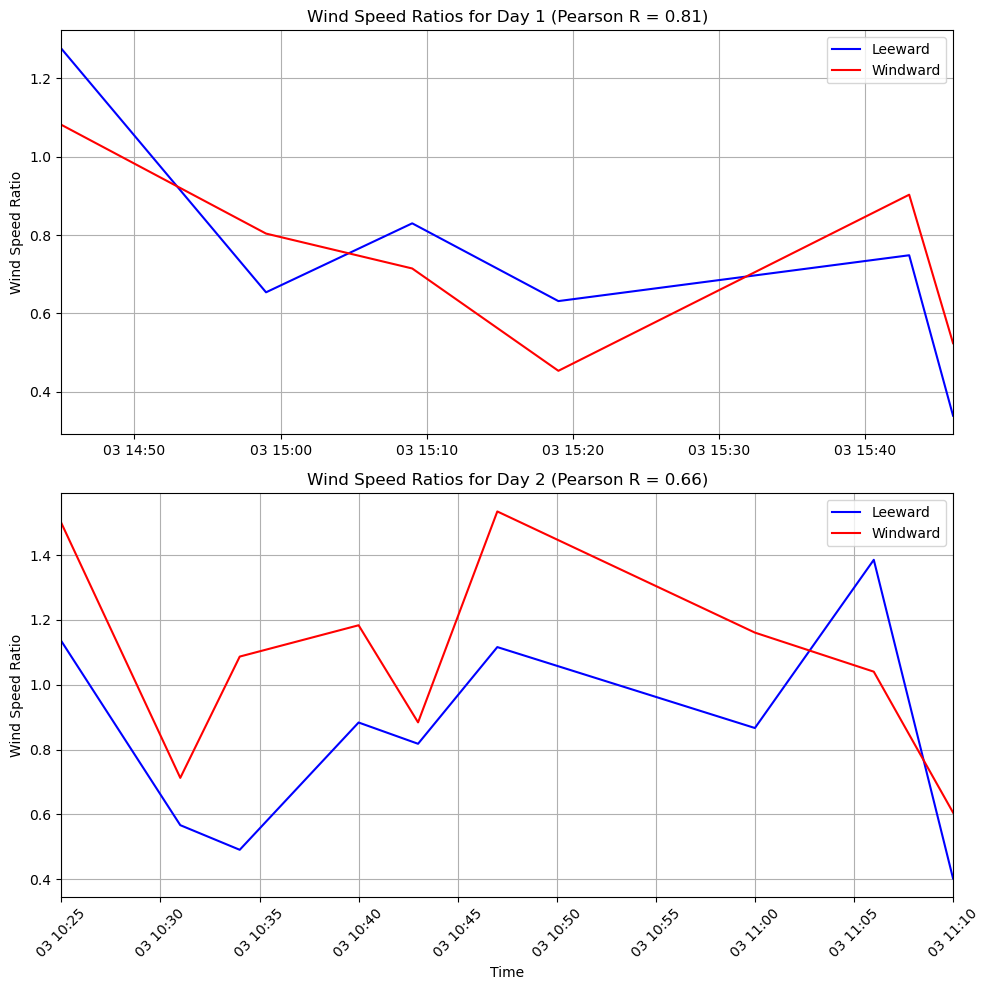

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load CSV files
df1 = pd.read_csv("BlackfordWindDataFull.csv")
df2 = pd.read_csv("BlackfordWindDataFullDay2.csv")

# Define mcount values
mcount = [2.29, 2.60, 2.49]  

# Convert time column to datetime for proper plotting
df1['TIME'] = pd.to_datetime(df1['TIME'])
df2['TIME'] = pd.to_datetime(df2['TIME'])

# Wind speed calculations
df1['a_speed1'] = (df1['ANEMOMETER 986 #TURNS'] * mcount[0] / 60) / df1['KESTREL WINDSPEED']
df1['a_speed2'] = (df1['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60) / df1['KESTREL WINDSPEED']

df2['a_speed3'] = (df2['ANEMOMETER 986 #TURNS'] * mcount[0] / 60) / df2['KESTREL WINDSPEED']
df2['a_speed4'] = (df2['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60) / df2['KESTREL WINDSPEED']

# Drop NaN values to ensure equal-length arrays for correlation
df1 = df1.dropna(subset=['a_speed1', 'a_speed2'])
df2 = df2.dropna(subset=['a_speed3', 'a_speed4'])

# Compute correlation for Day 1
if len(df1) > 1:  # Ensure there's enough data
    corr_day1, _ = pearsonr(df1['a_speed1'], df1['a_speed2'])
else:
    corr_day1 = np.nan

# Compute correlation for Day 2
if len(df2) > 1:  # Ensure there's enough data
    corr_day2, _ = pearsonr(df2['a_speed3'], df2['a_speed4'])
else:
    corr_day2 = np.nan

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# First subplot: Day 1
axes[0].plot(df1['TIME'], df1['a_speed2'], label="Leeward", color='blue', linestyle='-')
axes[0].plot(df1['TIME'], df1['a_speed1'], label="Windward", color='red', linestyle='-')
axes[0].set_ylabel("Wind Speed Ratio")
axes[0].set_title(f"Wind Speed Ratios for Day 1 (Pearson R = {corr_day1:.2f})")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xlim(df1['TIME'].min(), df1['TIME'].max())

# Second subplot: Day 2
axes[1].plot(df2['TIME'], df2['a_speed3'], label="Leeward", color='blue', linestyle='-')
axes[1].plot(df2['TIME'], df2['a_speed4'], label="Windward", color='red', linestyle='-')
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Wind Speed Ratio")
axes[1].set_title(f"Wind Speed Ratios for Day 2 (Pearson R = {corr_day2:.2f})")
axes[1].legend()
axes[1].grid(True)
axes[1].set_xlim(df2['TIME'].min(), df2['TIME'].max())

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("WindvsLee_Subplots.png")
plt.show()